# Importing Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

# Loading Data Into Dataframe

In [2]:
df = pd.read_csv(r'C:\Users\falco\OneDrive\Desktop\PROJECTS\PYTHON PROJECTS\MY PROJECTS\MACHINE LEARNING\Loan Approval\Loan.csv')

# Visualizins Top 5 Rows

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Shape Of Dataframe

In [4]:
df.shape

(614, 13)

# Info On Dataframe 

In [5]:
df.info

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849          

# Description On Data

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Columns Of Dataframe

In [8]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Null Values In Data

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Identifying Outliers in ApplicantIncome Using Boxplot

<Axes: >

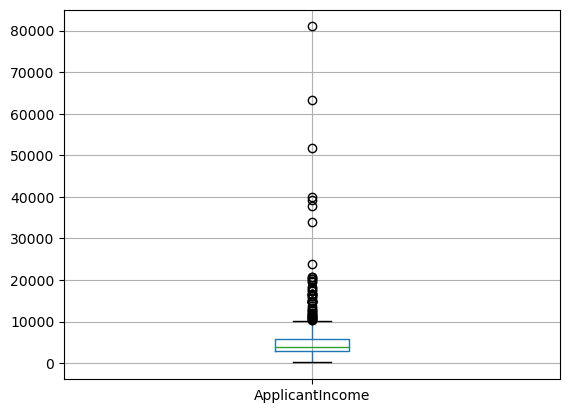

In [10]:
df.boxplot(column = 'ApplicantIncome')

# Relationship Between Credit History and loan Status using Crosstab

In [11]:
pd.crosstab(df['Credit_History'], df['Loan_Status'], margins = True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


# Findinng Skewness In Data Using Histogram

<Axes: >

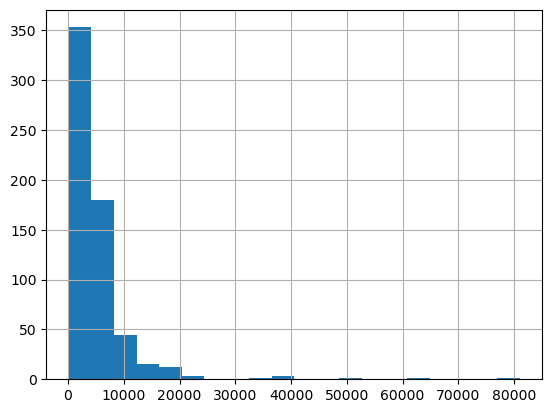

In [12]:
df['ApplicantIncome'].hist(bins = 20)

<Axes: >

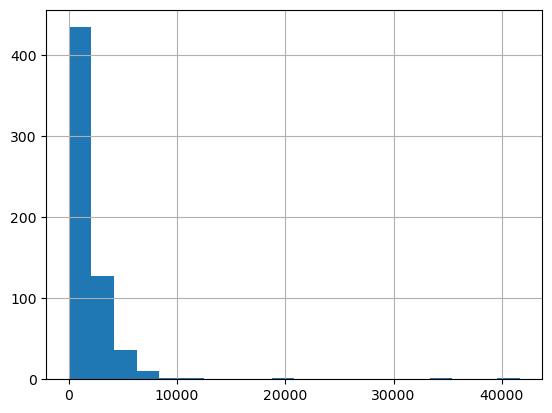

In [13]:
df['CoapplicantIncome'].hist(bins = 20)

# Relationship Between Income and Education with a Boxplot

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

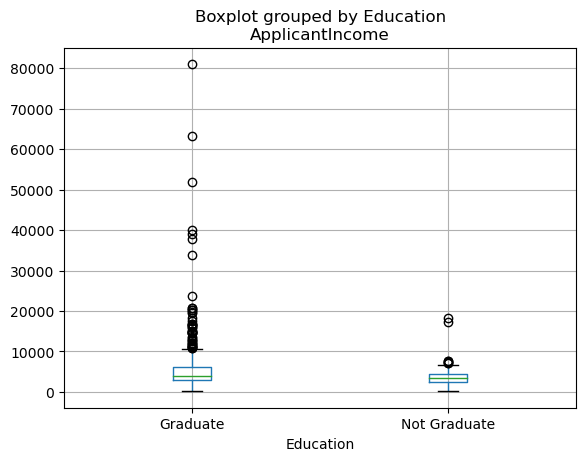

In [14]:
df.boxplot(column = 'ApplicantIncome', by = 'Education')

# Relationship Between Loan Amount and Education with a Boxplot

<Axes: title={'center': 'LoanAmount'}, xlabel='Education'>

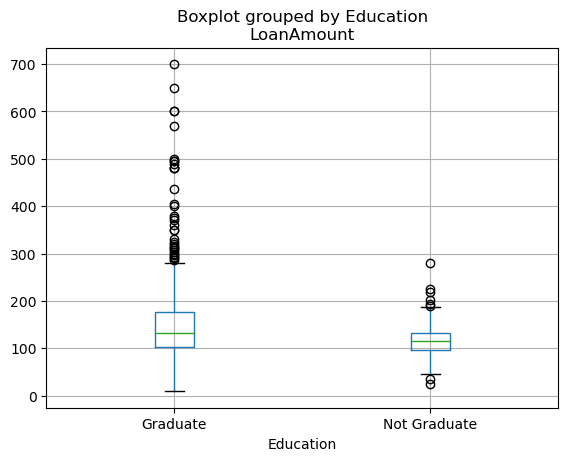

In [15]:
df.boxplot(column = 'LoanAmount', by = 'Education')

<Axes: >

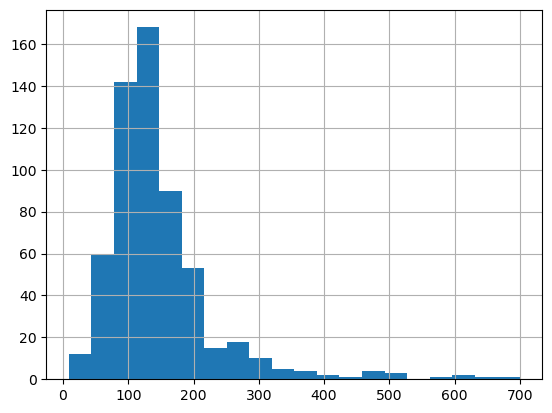

In [16]:
df['LoanAmount'].hist(bins = 20)

In [ ]:
# Normalizing Right Skew

<Axes: >

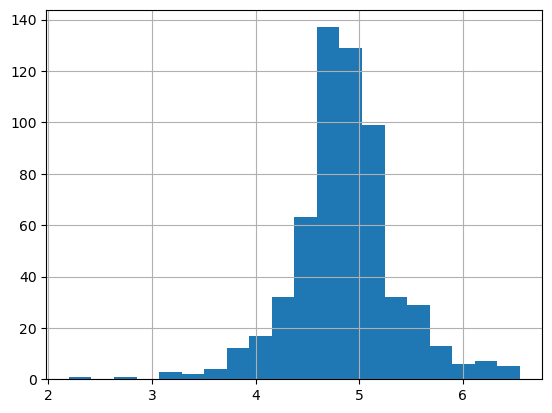

In [17]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins = 20)

In [ ]:
# Combining All Income Columns Before Normalizing

<Axes: >

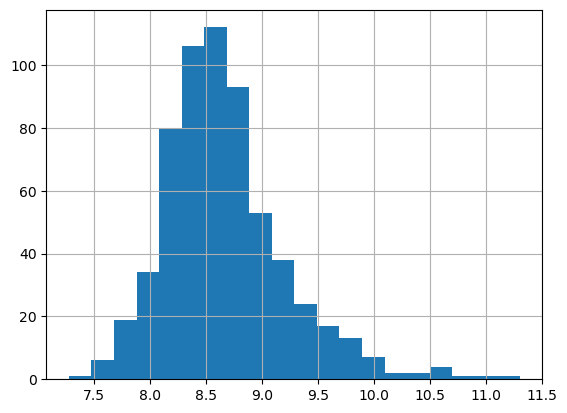

In [18]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins = 20)

# Filling missing values; categorical - mode, numeric - mean with indexing

In [19]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'TotalIncome', 'TotalIncome_log'],
      dtype='object')

In [23]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Married'].fillna(df['Married'].mode()[0], inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)
df['Education'].fillna(df['Education'].mode()[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)

In [25]:
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.LoanAmount_log = df.LoanAmount_log.fillna(df.LoanAmount_log.mean())

In [29]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)

In [30]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

# Dividing Data into Dpenedent and Independent Variables

In [52]:
X = df.iloc[:,np.r_[1:5,9:11,13:15]].values
y = df.iloc[:,12].values

In [53]:
X

array([['Male', 'No', '0', ..., 1.0, 4.857444178729352, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [54]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

# People Who Applied For A Loan By Gender

In [43]:
print('Number of people who applied for a loan by gender:')
print(df['Gender'].value_counts())

Number of people who applied for a loan by gender:
Male      502
Female    112
Name: Gender, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

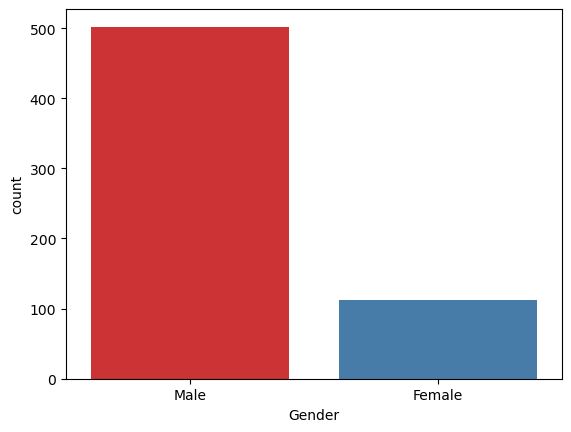

In [44]:
sns.countplot(x='Gender', data=df, palette = 'Set1')

# People Who Applied For A Loan By Martial Status

Number of people who applied for a loan by marital status:
Yes    401
No     213
Name: Married, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

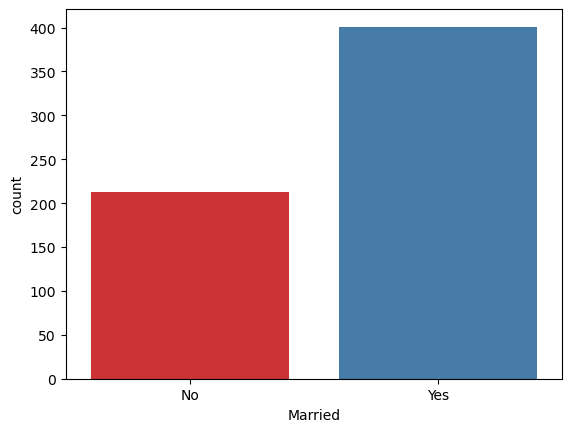

In [46]:
print('Number of people who applied for a loan by marital status:')
print(df['Married'].value_counts())
sns.countplot(x = 'Married', data = df, palette = 'Set1')

# People Who Applied For A Loan By Dependents

Number of people who applied for a loan by dependence:
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

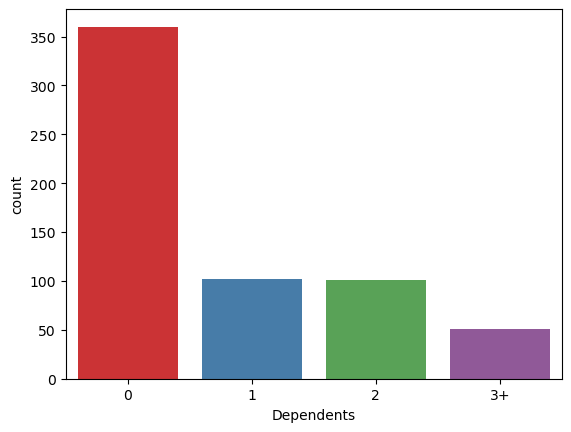

In [47]:
print('Number of people who applied for a loan by dependence:')
print(df['Dependents'].value_counts())
sns.countplot(x = 'Dependents', data = df, palette = 'Set1')

# People Who Applied For A Loan By Self-Employment Status

Number of people who applied for a loan by employment status:
No     532
Yes     82
Name: Self_Employed, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

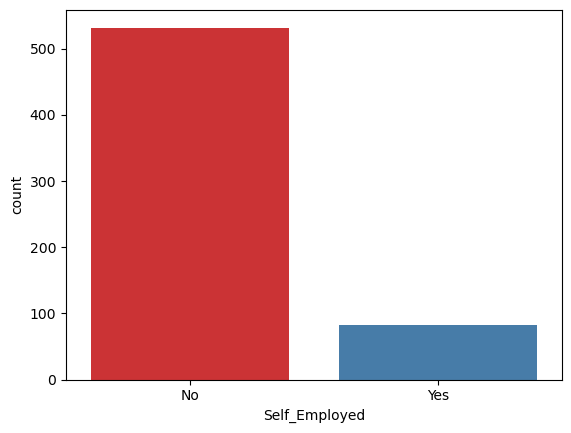

In [48]:
print('Number of people who applied for a loan by self-employment status:')
print(df['Self_Employed'].value_counts())
sns.countplot(x = 'Self_Employed', data = df, palette = 'Set1')

# People Who Applied For A Loan By Loan Amount

Number of people who applied for a loan by loan amount:
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64


<Axes: xlabel='LoanAmount', ylabel='count'>

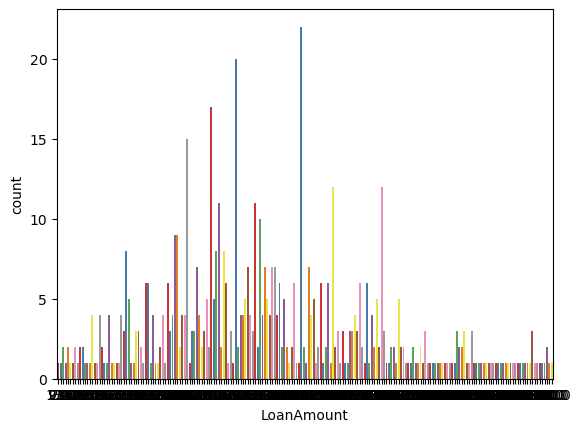

In [49]:
print('Number of people who applied for a loan by loan amount:')
print(df['LoanAmount'].value_counts())
sns.countplot(x = 'LoanAmount', data = df, palette = 'Set1')

In [ ]:
# People Who Applied For A Loan By Credit History

Number of people who applied for a loan by credit history:
1.0    525
0.0     89
Name: Credit_History, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

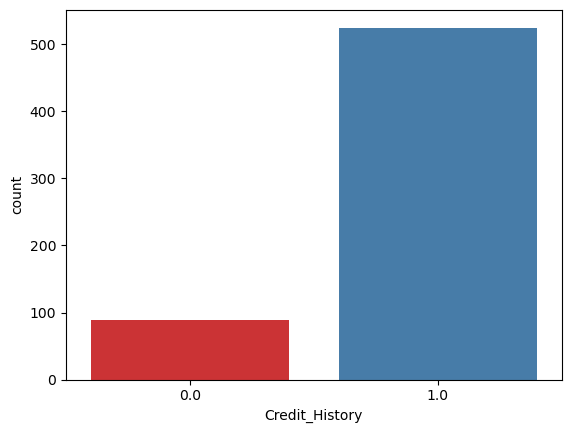

In [50]:
print('Number of people who applied for a loan by credit history:')
print(df['Credit_History'].value_counts())
sns.countplot(x = 'Credit_History', data = df, palette = 'Set1')

# Importing from sklearn x for dependent, y for independent and splitting data

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [88]:
print(X_train)

[['Female' 'No' '1' ... 1.0 4.882801922586371 5191.0]
 ['Male' 'Yes' '3+' ... 1.0 4.867534450455582 13746.0]
 ['Female' 'No' '2' ... 1.0 4.927253685157205 3427.0]
 ...
 ['Male' 'Yes' '2' ... 1.0 4.574710978503383 3875.0]
 ['Male' 'No' '0' ... 1.0 4.836281906951478 4690.0]
 ['Male' 'No' '0' ... 1.0 4.857444178729352 5849.0]]


# Converting Categorical Variables into Numrical Form With LabelEncoder

In [89]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

# Using a For Loop To Apply Conversion In Train Data

In [90]:
for i in range(0, 5):
    X_train[:,i] = labelencoder_X.fit_transform(X_train[:,i])

In [91]:
X_train[:,7] = labelencoder_X.fit_transform(X_train[:,7])

In [92]:
X_train

array([[0, 0, 1, ..., 1.0, 4.882801922586371, 203],
       [1, 1, 3, ..., 1.0, 4.867534450455582, 412],
       [0, 0, 2, ..., 1.0, 4.927253685157205, 51],
       ...,
       [1, 1, 2, ..., 1.0, 4.574710978503383, 87],
       [1, 0, 0, ..., 1.0, 4.836281906951478, 152],
       [1, 0, 0, ..., 1.0, 4.857444178729352, 256]], dtype=object)

# Creating A New Instance Of The Label Encoder For Yes and No Values In y

In [93]:
labelencoder_y = LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)

In [94]:
y_train

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,

# Using For Loop To Apply Conversion In test Data

In [95]:
for i in range(0, 5):
    X_test[:,i] = labelencoder_X.fit_transform(X_test[:,i])

In [96]:
X_test[:,7] = labelencoder_X.fit_transform(X_test[:,7])

# Converting Test Data In y

In [97]:
labelencoder_y = LabelEncoder()
y_test = labelencoder_y.fit_transform(y_test)

In [98]:
X_test

array([[0, 0, 0, 0, 7, 0.0, 4.330733340286331, 23],
       [0, 0, 0, 1, 7, 1.0, 5.41610040220442, 116],
       [1, 1, 0, 1, 8, 0.0, 4.605170185988092, 49],
       [1, 1, 2, 1, 4, 1.0, 4.727387818712341, 26],
       [1, 1, 1, 0, 7, 1.0, 3.258096538021482, 78],
       [1, 1, 1, 0, 7, 1.0, 5.799092654460526, 104],
       [1, 1, 0, 1, 7, 1.0, 4.927253685157205, 52],
       [1, 1, 2, 1, 7, 1.0, 4.68213122712422, 37],
       [1, 1, 0, 0, 6, 1.0, 4.553876891600541, 72],
       [0, 0, 0, 0, 7, 0.0, 4.2626798770413155, 18],
       [1, 1, 3, 0, 7, 0.0, 5.886104031450156, 120],
       [1, 1, 0, 0, 7, 1.0, 5.1647859739235145, 92],
       [0, 0, 1, 0, 7, 1.0, 4.857444178729352, 90],
       [0, 1, 2, 0, 8, 1.0, 4.727387818712341, 28],
       [1, 1, 0, 0, 7, 1.0, 4.857444178729352, 117],
       [0, 0, 0, 0, 7, 1.0, 5.556828061699537, 105],
       [1, 1, 2, 0, 7, 1.0, 5.4638318050256105, 99],
       [1, 1, 2, 1, 7, 1.0, 4.700480365792417, 59],
       [0, 0, 0, 0, 4, 1.0, 4.7535901911063645, 34],
     

In [99]:
y_test

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1])

# Scaling Data To Account For Different Ranges Using StandardScaler

In [100]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Creating An Instance Of Decision Tree and Testing Accuracy

In [115]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier = DecisionTreeClassifier(criterion = 'entropy', random_state =0)
DTClassifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

# Predicting Using This Algorithm

# Creating A New Variable

In [116]:
y_pred = DTClassifier.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1])

# Finding Accuracy Using Metrics

In [117]:
from sklearn import metrics
print("The Accuracy Of Decision Tree Is: ", metrics.accuracy_score(y_pred, y_test)*100)

The Accuracy Of Decision Tree Is:  65.04065040650406


# A Score of 65% Not Good So Applying Other Algorithm

In [118]:
from sklearn.naive_bayes import GaussianNB
NBClassifier = GaussianNB()
NBClassifier.fit(X_train, y_train)

GaussianNB()

In [119]:
y_pred = NBClassifier.predict(X_test)

In [120]:
y_pred

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [121]:
print("The Accuracy Of Naive Bayes Is: ", metrics.accuracy_score(y_pred, y_test)*100)

The Accuracy Of Naive Bayes Is:  84.5528455284553


# Accuracy of 84% Quite Good But Try Another

In [122]:
from sklearn.ensemble import RandomForestClassifier
RFClassifier = RandomForestClassifier()
RFClassifier.fit(X_train, y_train)

RandomForestClassifier()

In [123]:
y_pred = RFClassifier.predict(X_test)

In [124]:
print("The Accuracy Of Random Forest Is: ", metrics.accuracy_score(y_pred, y_test)*100)

The Accuracy Of Random Forest Is:  78.04878048780488


# Accuracy is 78% Trying Another

In [125]:
from sklearn.neighbors import KNeighborsClassifier
KNClassifier = KNeighborsClassifier()
KNClassifier.fit(X_train, y_train)

KNeighborsClassifier()

In [126]:
y_pred = KNClassifier.predict(X_test)

In [127]:
print("The Accuracy Of Neighbors Classifier Is: ", metrics.accuracy_score(y_pred, y_test)*100)

The Accuracy Of Neighbors Classifier Is:  79.67479674796748


# Accuracy of 79%. Thus We Use Bayes

# Trying Bayes on Test Data Having No Eligibility Label 

In [129]:
data = pd.read_csv(r"C:\Users\falco\OneDrive\Desktop\PROJECTS\PYTHON PROJECTS\MY PROJECTS\MACHINE LEARNING\Loan Approval\LoanTest.csv")

# Visualising Head

In [130]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267,360,1,Urban


# Making Sure There Are No Missing Values

In [131]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Normalizing and Visualising Here Too

In [132]:
data['LoanAmount_log'] = np.log(data['LoanAmount'])

In [133]:
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data['TotalIncome_Log'] = np.log(data['TotalIncome'])

<Axes: >

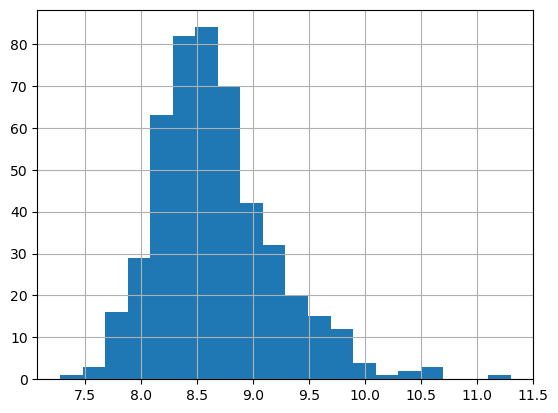

In [134]:
data['TotalIncome_Log'].hist(bins = 20)

In [135]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_Log
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,4.852030,6091.0,8.714568
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,4.189655,3000.0,8.006368
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,4.787492,4941.0,8.505323
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,4.948760,6000.0,8.699515
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267,360,1,Urban,5.587249,9613.0,9.170872


# Selecting data into variable

In [136]:
test = data.iloc[:,np.r_[1:5,9:11,13:15]].values

# Convert categorical to num

In [137]:
for i in range(0, 5):
    test[:,i] = labelencoder_X.fit_transform(test[:,i])

In [138]:
test[:,7] = labelencoder_X.fit_transform(test[:,7])

In [139]:
test

array([[1, 1, 1, ..., 1, 6091.0, 261],
       [1, 1, 0, ..., 1, 3000.0, 34],
       [1, 1, 0, ..., 1, 4941.0, 185],
       ...,
       [1, 1, 1, ..., 1, 8312.0, 338],
       [1, 1, 2, ..., 1, 7583.0, 322],
       [0, 0, 0, ..., 0, 4583.0, 144]], dtype=object)

# Scaling test data

In [140]:
test = sc.fit_transform(test)

# Finally let's predict

In [141]:
pred = NBClassifier.predict(test)

In [142]:
pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,